<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/master/Python_misc_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(未編集)

# 数学の基礎事項について



※関連するノートブック

## 微分

日本では、中学校(2年?)で傾きと切片を学習する。

ある直線$y=ax+b$を考えたとき、直線の傾き$a$に着目すれば、  
$x$の増加分に対して$y$がどれだけ変化するかを知ることができる。

一方、実社会で扱うデータは、一般に直線よりも複雑な形をしていて、  
それを式で表現しようと思うと、様々な関数の形を考える必要がある。  
(たとえば何かの値の季節変動などをイメージしてください)

そこで、直線の場合の[傾き]を、直線以外の関数に"拡張"しようと考えるのは  
至って自然な発想といえる。それが**微分**の概念である.

微分(積分)の歴史は古く、人類史のどの時点でアイデアが確立したとするかは諸説あるが  
最も代表的なものは、17世紀にニュートンとライプニッツが確立したとする説で  
ニュートンは微分の概念を独自に定式化し、天体の軌道などを予測するなどの偉大な功績を残した.

以下の内容は、全学向けの授業ということもあって厳密性はかなり犠牲にして微分の概念を導入している  
(もちろん、大学の数学の教科書に載っている関数の連続性や微分の厳密な定義は非常に重要です).

時間があったら、ヨビノリさんの[「中学数学からはじめる微分積分」](https://youtu.be/4p1rwfXbCoY)を視聴していただけると、  
「なぜ微分なんてものを考えないといけないのか」のイメージがつくのかな、と思います。

補足資料: [講義ノート](https://drive.google.com/file/d/1ZKi8DJFSg00xir1IoEQiw3z9vxmejeCv/view)の4章[数学的準備]


### 微分の基本的な考え方

定義: ある変数$x$について関数$f(x)$が与えられているとき、  
関数$f(x)$の$x=a$での微分を  
$f'(a)=\lim_{\delta \to 0} \frac{f(a+\delta)-f(a)}{\delta}$と定義する.  

ここで、$\lim_{\delta \to 0}$は0に限りなく近い(無限小)の$\delta$を考えることを意味する。  

つまり、関数をある点からちょこっとだけ動かしたときに、  
関数の値が変動する度合いがどれくらいかを表しています。  
上の定義は「無限小の幅で関数を直線で近似して傾きを計算している」とも言いかえられるでしょう。

**直線の例**  
$f(x) = ax + b $の$x=x_1$での微分値は定義に当てはめて計算すると  
$f'(x_1)= \lim_{\delta \to 0} \frac{f(x_1+\delta)-f(x_1)}{\delta}= \lim_{\delta \to 0} \frac{(a(x_1+\delta)+b)-(ax_1+b)}{\delta} = a $ となる。  
つまり微分の値は直線の傾きに対応していて、  
なおかつ微分の値はどこの場所($x$)で調べても定数$a$であることを意味している。


**二次関数(放物線)の例**  
$f(x) = ax^2 + bx +c $
の$x=x_1$での微分は、定義にならって計算すると
$f'(x_1) = 2ax_1+b$となる(確かめてみよう)  
一方で$f(x)$を平方完成すると$f(x)=a(x+\frac{b}{2a})^2 -\frac{b^2}{4a} +c$となり、  
$x=-b/(2a)$で傾きが0になる。  
つまりこの二次関数は$x=-b/(2a)$で極値($a>0$なら最小値, $a<0$なら最大値)を持つ。

微分が0というのは関数の形がそこで谷や峠になっていることを意味する。  
実際上の例でも微分の値は$x_1=-b/(2a)$のとき、値は0になっている.







a=2.0,b=4.0,c=5.0とでもして、図をかいてみよう

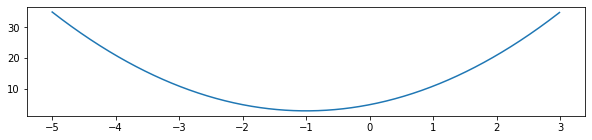

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
xr = np.arange(-5.0,3.0,0.01)
yr = 2.0 * xr**2 + 4.0 * xr + 5.0
fig = plt.figure(figsize=(10,2))
plt.plot(xr,yr)
plt.show()

確かに$x=-b/(2a)=-1.0$のところで極値(最小値)となっている。

微分の値もplotしてみると

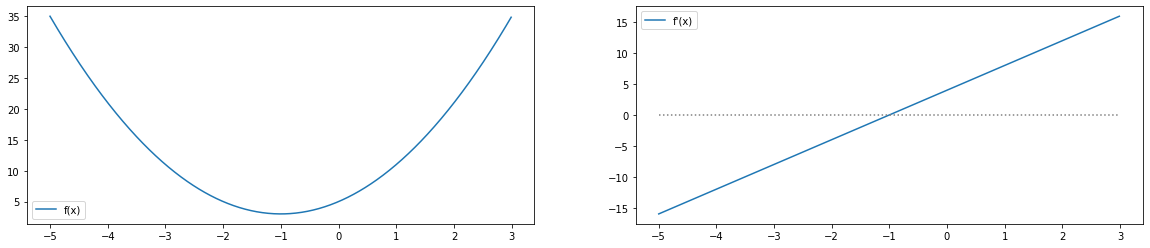

In [ ]:
xr = np.arange(-5.0,3.0,0.01)
yr = 2.0 * xr**2 + 4.0 * xr + 5.0
yp = 4.0 * xr + 4.0 
fig = plt.figure(figsize=(20,4))
axs = [fig.add_subplot(121),fig.add_subplot(122)]
axs[0].plot(xr,yr,label="f(x)"); axs[0].legend()
axs[1].plot(xr,yp,label="f'(x)");axs[1].plot([-5,3],[0,0],color="gray",linestyle="dotted");axs[1].legend()
plt.show();plt.close()

$x<-1$では$f'(x)<0$で、$x>-1$では$f'(x)>0$となっていますね。

これまでは、定義に即して微分の値を計算していましたが、毎回調べたい点で定義に立ち返るというのは面倒です。

関数が閉じた形で与えられているとき(つまり、$f(x)$が$x$の具体的な表式で与えられているとき)  
多くはその微分$f'(x)$も$x$の関数として書き下すことができます。  

そうすれば、$x$に特定の値を代入すれば好きな点での微分の値$f'(x)$を知ることができます。


とりあえずは以下を公式的に抑えておけば問題は有りません。

1. $x$の$x$に対する微分は1
2. $a x^p$の$x$に対する微分は$apx^{p-1}$ ($a$は非ゼロの定数)
3. $\exp{(x)}$(ネイピア数$e$の$x$乗)の$x$に対する微分は$\exp{(x)}$ 
4. $\cos{x}$の$x$に対する微分は$-\sin{x}$
5. $\sin{x}$の$x$に対する微分は$\cos{x}$
6. $\ln{x}$の$x$に対する微分は$1/x$

いずれも、上の微分の定義や、指数関数/三角関数/対数関数の定義(c.f. マクローリン展開)から証明することができますので、興味があれば人生で一度はやってみてください。
